In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import missingno as msno
pd.set_option('display.max_rows', 80)
pd.set_option("display.max_columns", 100)
%matplotlib inline

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


* Home Creditはどのような企業？
* このコンペティションでは何を予測する？
* それを予測することで企業が得られるメリットは何？

>**(考察)**  
>* ローン借入時に信用履歴が十分に存在しないクライアントに対しての信用（ローン返済能力）を評価する会社   
　様々な取引データを利用してクライアントの返済能力を評価する事業を行っている
 
>* クライアントの真の返済能力を予測するコンペティション

>* 本当に返済能力のあるクライアントに対して借入の後押しができるため、貸倒れのリスクを最小限にし、企業としての利益を最大化できる

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

* .head()、.info()、describe()などを使う
* 欠損値の有無を見る
* クラスごとのデータ数をグラフに出す


In [103]:
#データの読み込み
train = pd.read_csv("application_train.csv")

### .head()、.info()、describe()などを使う

In [104]:
#データの概観の把握
display(train.head())
display(train.info())
display(train.describe())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

### 欠損値の有無を見る

In [105]:
#欠損を確認する関数の作成
def missing_table(df):
    missing = df.isnull().sum()
    percent = df.isnull().sum() / len(df)
    dtypes = df[df.isnull().sum().index].dtypes
    missing_table = pd.concat([missing, percent, dtypes], axis=1, keys=["number_of_na", "percent", "type"])
    missing_table = missing_table[missing_table["percent"] > 0].sort_values(by="number_of_na", ascending=False)
    return missing_table

In [106]:
na_columns = missing_table(train)
na_columns.sort_values(by="number_of_na", ascending=False)

,number_of_na,percent,type
COMMONAREA_MEDI,214865,0.698723,float64
COMMONAREA_MODE,214865,0.698723,float64
COMMONAREA_AVG,214865,0.698723,float64
NONLIVINGAPARTMENTS_MEDI,213514,0.694330,float64
NONLIVINGAPARTMENTS_MODE,213514,0.694330,float64
NONLIVINGAPARTMENTS_AVG,213514,0.694330,float64
FONDKAPREMONT_MODE,210295,0.683862,object
LIVINGAPARTMENTS_MODE,210199,0.683550,float64
LIVINGAPARTMENTS_MEDI,210199,0.683550,float64
LIVINGAPARTMENTS_AVG,210199,0.683550,float64


In [107]:
#クラス毎の欠損の割合を比較
pd.concat([missing_table(train[train["TARGET"] == 0])[["number_of_na", "percent"]],
           missing_table(train[train["TARGET"] == 1])[["number_of_na", "percent"]]],
          axis=1, keys=["0", "1"])

C:\Users\syous\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


0                      1          
                             number_of_na   percent number_of_na   percent
AMT_ANNUITY                            12  0.000042          NaN       NaN
AMT_GOODS_PRICE                       257  0.000909         21.0  0.000846
AMT_REQ_CREDIT_BUREAU_DAY           37227  0.131690       4292.0  0.172890
AMT_REQ_CREDIT_BUREAU_HOUR          37227  0.131690       4292.0  0.172890
AMT_REQ_CREDIT_BUREAU_MON           37227  0.131690       4292.0  0.172890
AMT_REQ_CREDIT_BUREAU_QRT           37227  0.131690       4292.0  0.172890
AMT_REQ_CREDIT_BUREAU_WEEK          37227  0.131690       4292.0  0.172890
AMT_REQ_CREDIT_BUREAU_YEAR          37227  0.131690       4292.0  0.172890
APARTMENTS_AVG                     141776  0.501532      14285.0  0.575428
APARTMENTS_MEDI                    141776  0.501532      14285.0  0.575428
APARTMENTS_MODE                    141776  0.501532      14285.0  0.575428
BASEMENTAREA_AVG                   163905  0.579813      16038.0  0.646042
BASEMENTAREA_MEDI                  163905  0.579813      16038.0  0.646042
BASEMENTAREA_MODE                  163905  0.579813      16038.0  0.646042
CNT_FAM_MEMBERS                         2  0.000007          NaN       NaN
COMMONAREA_AVG                     196442  0.694912      18423.0  0.742115
COMMONAREA_MEDI                    196442  0.694912      18423.0  0.742115
COMMONAREA_MODE                    196442  0.694912      18423.0  0.742115
DAYS_LAST_PHONE_CHANGE                  1  0.000004          NaN       NaN
DEF_30_CNT_SOCIAL_CIRCLE              985  0.003484         36.0  0.001450
DEF_60_CNT_SOCIAL_CIRCLE              985  0.003484         36.0  0.001450
ELEVATORS_AVG                      148976  0.527002      14915.0  0.600806
ELEVATORS_MEDI                     148976  0.527002      14915.0  0.600806
ELEVATORS_MODE                     148976  0.527002      14915.0  0.600806
EMERGENCYSTATE_MODE                132257  0.467858      13498.0  0.543726
ENTRANCES_AVG                      140617  0.497432      14211.0  0.572447
ENTRANCES_MEDI                     140617  0.497432      14211.0  0.572447
ENTRANCES_MODE                     140617  0.497432      14211.0  0.572447
EXT_SOURCE_1                       158607  0.561071      14771.0  0.595005
EXT_SOURCE_2                          608  0.002151         52.0  0.002095
EXT_SOURCE_3                        55288  0.195581       5677.0  0.228681
FLOORSMAX_AVG                      138956  0.491556      14064.0  0.566526
FLOORSMAX_MEDI                     138956  0.491556      14064.0  0.566526
FLOORSMAX_MODE                     138956  0.491556      14064.0  0.566526
FLOORSMIN_AVG                      190634  0.674367      18008.0  0.725398
FLOORSMIN_MEDI                     190634  0.674367      18008.0  0.725398
FLOORSMIN_MODE                     190634  0.674367      18008.0  0.725398
FONDKAPREMONT_MODE                 192170  0.679800      18125.0  0.730111
HOUSETYPE_MODE                     140177  0.495875      14120.0  0.568781
LANDAREA_AVG                       166486  0.588943      16104.0  0.648701
LANDAREA_MEDI                      166486  0.588943      16104.0  0.648701
LANDAREA_MODE                      166486  0.588943      16104.0  0.648701
LIVINGAPARTMENTS_AVG               192077  0.679471      18122.0  0.729990
LIVINGAPARTMENTS_MEDI              192077  0.679471      18122.0  0.729990
LIVINGAPARTMENTS_MODE              192077  0.679471      18122.0  0.729990
LIVINGAREA_AVG                     140239  0.496095      14111.0  0.568419
LIVINGAREA_MEDI                    140239  0.496095      14111.0  0.568419
LIVINGAREA_MODE                    140239  0.496095      14111.0  0.568419
NAME_TYPE_SUITE                      1222  0.004323         70.0  0.002820
NONLIVINGAPARTMENTS_AVG            195187  0.690473      18327.0  0.738248
NONLIVINGAPARTMENTS_MEDI           195187  0.690473      18327.0  0.738248
NONLIVINGAPARTMENTS_MODE           195187  0.690473      18327.0 

>**(考察)**  
クラス間で欠損率１０%以上の差があるような大きな欠損の偏りは見られなかったため、欠損の状態がターゲットの決め手にはならない。
主にクライアントの住宅情報に関連する情報が欠損していることがわかる。
不要な情報と断言できないため今回は欠損の補完や削除は行わなず他の特徴量との相関を観察することとする。

### クラスごとのデータ数をグラフに出す

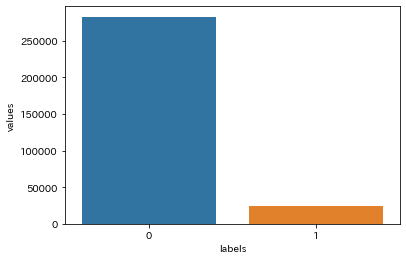

In [90]:
# 目的変数の分布を観察
temp = train["TARGET"].value_counts()
df = pd.DataFrame({"labels": temp.index,
                   "values": temp.values
                  })
sns.barplot(x="labels", y ="values", data=df)
plt.show()

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。


**(考察・分かったこと)**  
* 307,511行、122列の情報をもつデータセット
* 貸付困難が約8％、それ以外は返済能力あり
* 欠損の割合が高いカラムが存在するが、目的変数（0、1）間での大きな偏りはない
* データが持つカラムの情報を観察し、以下の考察を得た

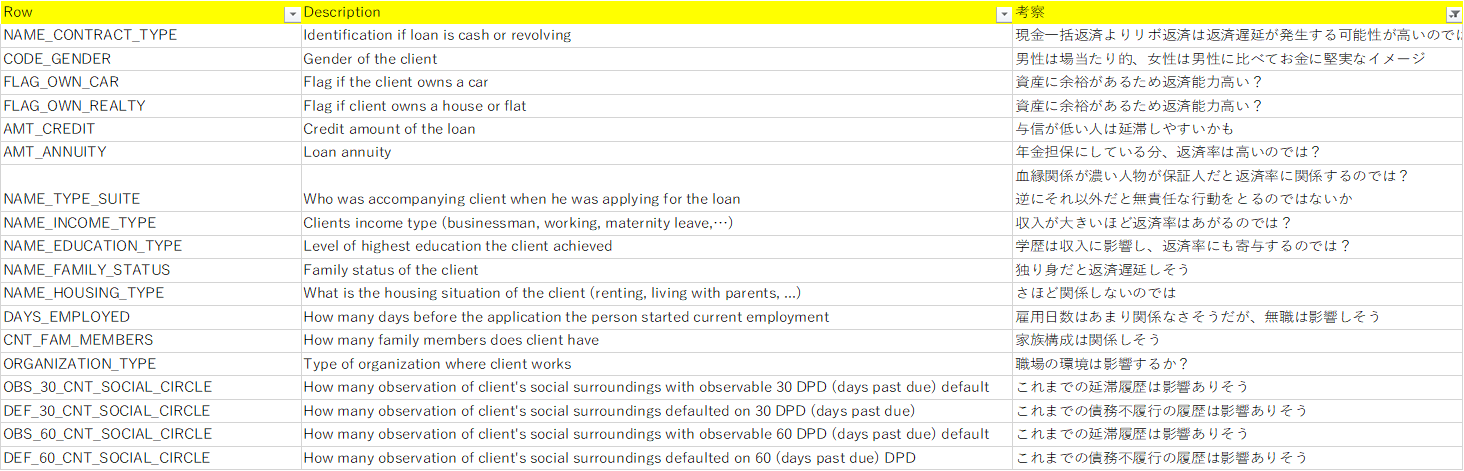

**(課題)**

目的変数と相関がありそうなカラム（上図の）に対して、得た考察を元に、目的変数との関係性を可視化し、仮説の検証を進める

**(問題)**
* 収入の分布は同じだった　⇒　例えば、借入額に対しての年収を特徴として観察しなければならないのでは？
* 欠損率は全体でみるのではなく、クラス毎の欠損率を出さないと影響は読み取れない
* １特徴量でターゲットの分布を観察したときの、有意差をどういう基準で判定するか
* オブジェクト型の変数を数値に変換して分析を行う
* クラスごとの代表値の差を観察して特徴をあぶりだす

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。

考察を伴う表やグラフを 15個以上 作成してください。

### ローンの種類(NAME_CONTRACT_TYPE)とターゲットとの相関を観察

In [365]:
# 目的変数を変数yにセット
y = train["TARGET"]

#
def plot_stats(feature, rotation=False, legend=True):
    data = pd.crosstab(train[feature], train["TARGET"])
    
    fig = plt.figure(figsize=(12,6))
    
    #円グラフ
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.pie(data[0], labels=data.index, startangle=90, counterclock=False, autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
    ax1.set_title("percent of target 0", fontsize=16)
    
    
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.pie(data[1], labels=data.index, startangle=90, counterclock=False, autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
    ax2.set_title("percent of target 1", fontsize=16)
    
    if legend:
        ax1.legend(fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
        ax2.legend(fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))

    #棒グラフ
    ax3 = fig.add_subplot(2, 2, 3)
    sns.barplot(x=data.index, y=data[0], data=data, ax=ax3)
    ax3.set_ylabel("number of x")
    y_min, y_max = ax3.get_ylim()
    
    ax4 = fig.add_subplot(2, 2, 4)
    sns.barplot(x=data.index, y=data[1], data=data, ax=ax4)
    ax4.set_ylim(y_min, y_max)

    if rotation:
        fig.autofmt_xdate(rotation=-45)

    plt.tight_layout()
    plt.show()

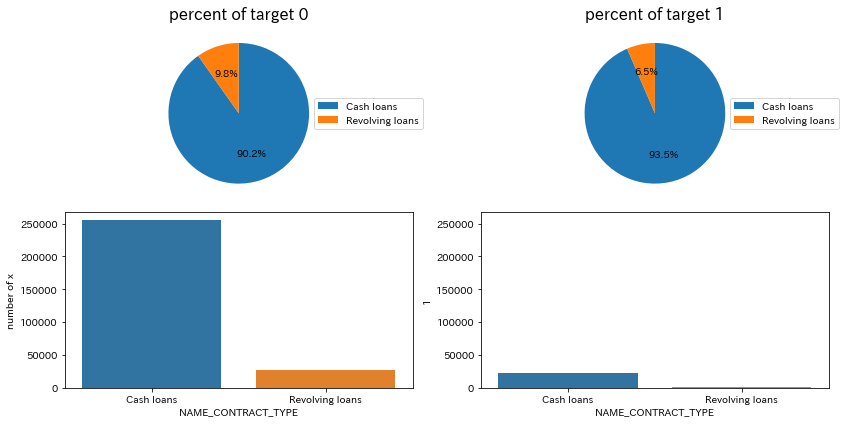

In [356]:
plot_stats("NAME_CONTRACT_TYPE")

リボ返済のほうが返済遅延が発生する確率が上がると推測していたが、逆に少し下がることが分かった。  
返済方法による返済遅延リスクへの影響はそこまで大きくないと分かった

### 性別（CODE_GENDER）とターゲットとの相関を観察

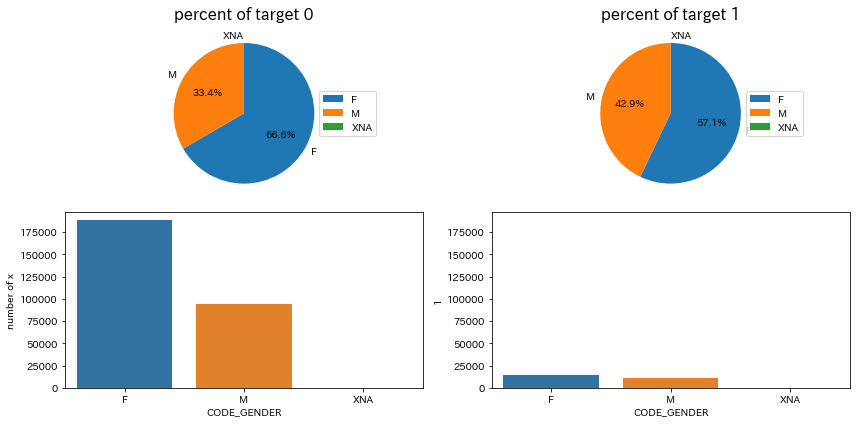

In [333]:
plot_stats("CODE_GENDER")

ローン全体の性別別の申し込み者数は男性より女性のほうが多いことが分かる  
やはり予想通りターゲット１に占める男性の割合は、ターゲット０での割合に比べ、増加している。

### 車の所有有無（FLAG_OWN_CAR）とターゲットとの相関の観察

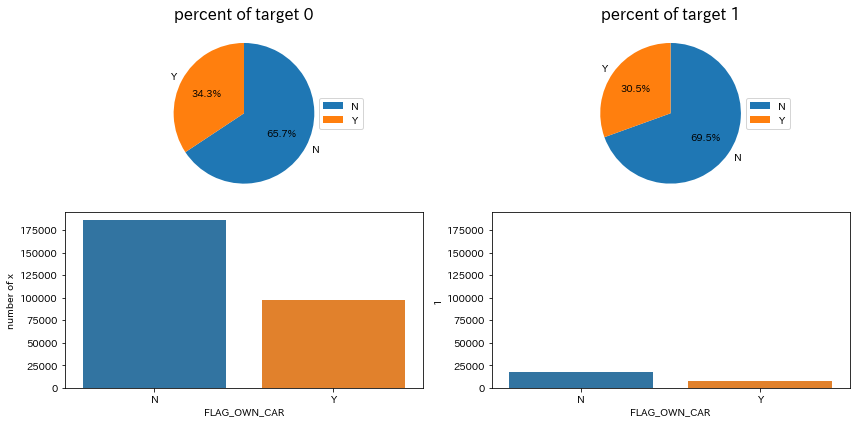

In [334]:
plot_stats("FLAG_OWN_CAR")

予想通り車の所有をしている人はターゲット０の方が少しだけ割合が高い  
が、そんなに大きい差とはいえない

### 家の所有有無（FLAG_OWN_REALTY）とターゲットとの相関の観察

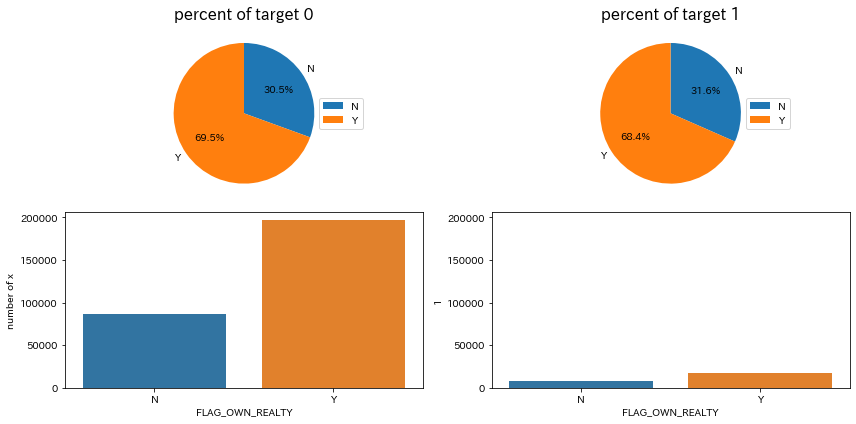

In [335]:
plot_stats("FLAG_OWN_REALTY")

予想通り家の所有をしている人はターゲット０の方が少しだけ割合が高い  
が、そんなに大きい差とはいえない

### 借入額（AMT_CREDIT）とターゲットとの相関の観察

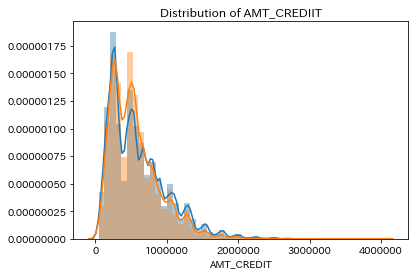

In [336]:
sns.distplot(train.AMT_CREDIT[train["TARGET"] == 0])
sns.distplot(train.AMT_CREDIT[train["TARGET"] == 1])
plt.title("Distribution of AMT_CREDIIT")
plt.show()

借入額の大きさによる分布の大きな偏りはみられない  
収入に対する借入金額の比率は後々の分析にヒントになるかも・・・

### 年金（AMT_ANNUITY）とターゲットとの相関の観察

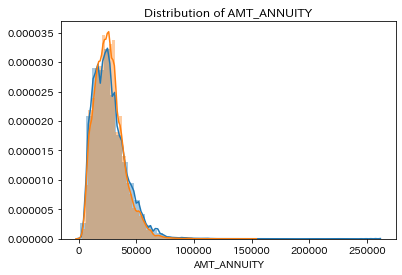

In [337]:
sns.distplot(train.AMT_ANNUITY[train["TARGET"] == 0].dropna())
sns.distplot(train.AMT_ANNUITY[train["TARGET"] == 1].dropna())
plt.title("Distribution of AMT_ANNUITY")
plt.show()

### 収入（AMT_INCOME_TOTAL）とターゲットとの相関の観察

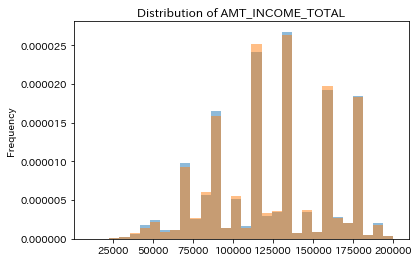

In [338]:
train.AMT_INCOME_TOTAL[train["TARGET"] == 0].plot.hist(bins=30,range=(10000,200000), density=True, alpha=0.5)
train.AMT_INCOME_TOTAL[train["TARGET"] == 1].plot.hist(bins=30,range=(10000,200000), density=True, alpha=0.5)
plt.title("Distribution of AMT_INCOME_TOTAL")
plt.show()

年収の分布もターゲットによって変わらない事が分かった。  
年収に対する借入額が大きい人は返済が滞る可能性が高いのではないかと仮説を立て以下検証を進める

In [339]:
#年収 ÷ 借入額を特徴量として追加
train["INCOME_PER_CREDIT"] = train["AMT_INCOME_TOTAL"] / train["AMT_CREDIT"]

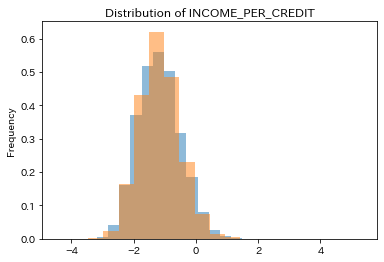

In [340]:
train.INCOME_PER_CREDIT[train["TARGET"] == 0].apply(np.log).plot.hist(bins=20, density=True, alpha=0.5)
train.INCOME_PER_CREDIT[train["TARGET"] == 1].apply(np.log).plot.hist(bins=20, density=True, alpha=0.5)
plt.title("Distribution of INCOME_PER_CREDIT")
plt.show()

分布は同じ。借入額の上限は年収によって定められているため、返済能力を超えた借入はできないシステムになっていることが原因と考えられる

### 家族構成（NAME_FAMILY_STATUS・CNT_FAM_MEMBERS）とターゲットとの相関の観察

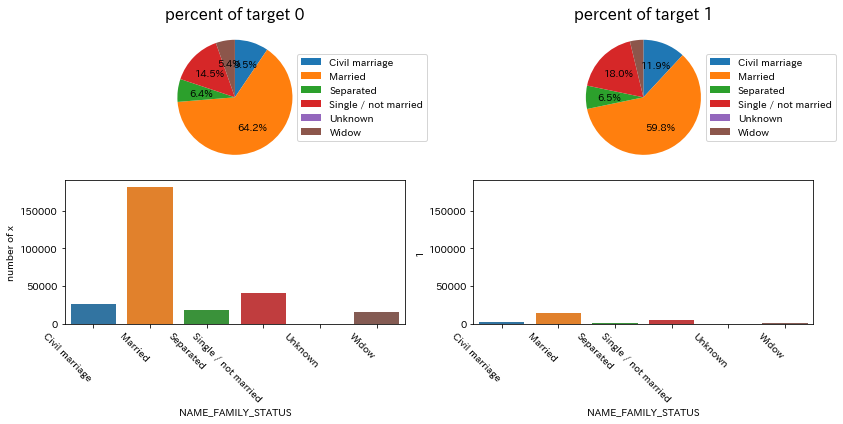

In [357]:
plot_stats("NAME_FAMILY_STATUS", True)

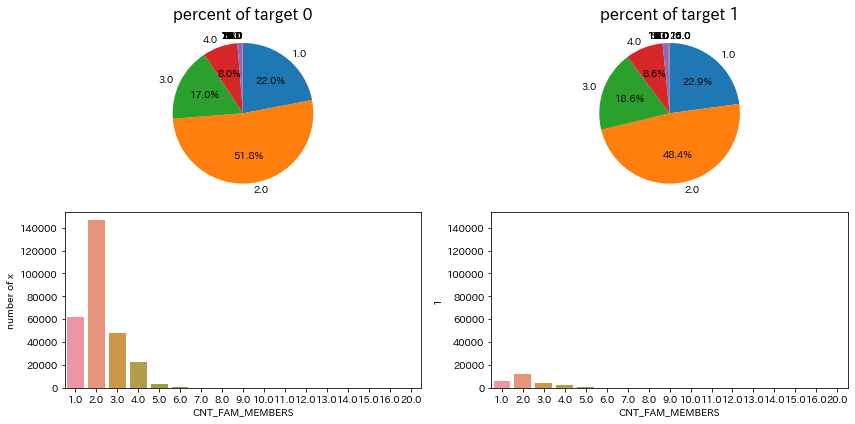

In [366]:
plot_stats("CNT_FAM_MEMBERS", legend=False)

独り身や民事婚での配偶関係にある場合、ターゲット１に含まれる割合が高い  
延滞することでの、のしかかる責任感がちがうのか...人に迷惑をかけたくないなどの心理的要因？   
これまでの検証から年収や資産といった物理的な返済能力というよりも、その個人の性格や人柄などの心理的要因がターゲットへの影響は大きいのではないかと考える

### 職種（OCCUPATION_TYPE）とターゲットとの相関の観察

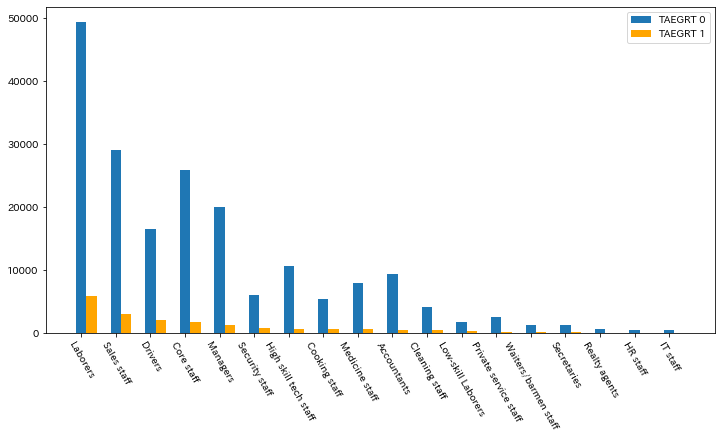

In [407]:
data = pd.crosstab(train["OCCUPATION_TYPE"], train["TARGET"]).sort_values(1, ascending=False)

label = np.arange(1, len(data.index) + 1)

plt.figure(figsize=(12,6))
plt.bar(label, data[0], width=0.3, label="TAEGRT 0")
plt.bar(label+0.3, data[1], color="orange", width=0.3, label="TAEGRT 1")
plt.xticks(label, data.index, rotation=-60)
plt.legend()
plt.show()

ターゲット間で分布に違いがある。職種によって返済能力との因果関係がある？

信用情報機関のデータを調査することは、クライアントの性格や過去の取引履歴などが分かるため、重要な指標があると考えられる